In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/emaize


In [3]:
import h5py

In [6]:
with h5py.File('output/random_projection/2bit/normalized_matrix/r=10000', 'r') as f:
    X = f['X'][:]

In [11]:
with h5py.File('data/phenotypes/all', 'r') as f:
    y = f['trait1'][:]

In [78]:
avail_index = np.nonzero(~np.isnan(y))[0]
train_index = np.random.choice(avail_index, size=int(avail_index.shape[0]*0.8), replace=False)
test_index = np.setdiff1d(avail_index, train_index)
print train_index.shape, test_index.shape

(3803,) (951,)


In [66]:
class GeneralizedRidge(object):
    def __init__(self, alphas):
        self.alphas = alphas
        
    def fit(self, X, y):
        n, p = X.shape
        if self.alphas.shape[0] != X.shape[1]:
            raise ValueError('number of alphas is not equal to number of columns in X')
        X = np.concatenate((X, np.ones(n)[:, np.newaxis]), axis=1)
        K = np.dot(X.T, X)
        ii = np.arange(p)
        K[ii, ii] += self.alphas
        K_inv = np.linalg.inv(K)
        beta = K_inv.dot(X.T).dot(y)
        self.H_ = X.dot(K_inv).dot(X.T)
        self.coef_ = beta[:-1]
        self.intercept_ = beta[-1]

alphas = np.ones(X.shape[1])
alphas[(X.shape[1]/2):] = 10

model = GeneralizedRidge(alphas=alphas)
model.fit(X[train_index], y[train_index])

In [67]:
print model.coef_
print model.intercept_

[ 0.01143032  0.01892389  0.01061736 ...,  0.00950807  0.00494663
 -0.00306728]
-0.0939543769582


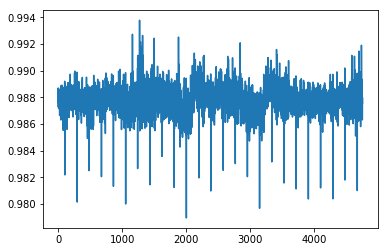

In [76]:
plot(np.diag(model.H_))

In [65]:
(model.coef_[:(X.shape[1]/2)]**2).mean(), (model.coef_[(X.shape[1]/2):]**2).mean()

(0.00047929785869082748, 4.304399746244901e-05)

In [32]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X[train_index], y[train_index])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [41]:
print model_ridge.coef_
print model_ridge.intercept_

[ 0.00725508  0.0014338   0.01407275 ...,  0.02230113  0.03005994
 -0.0117165 ]
-0.118361906131


(0.75453987106691944, 0.0)


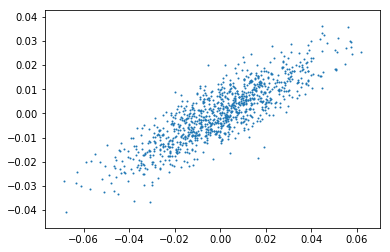

In [62]:
from scipy.stats import pearsonr
print pearsonr(model.coef_, model_ridge.coef_)
scatter(model.coef_[:1000], model_ridge.coef_[:1000], s=1)

In [51]:
K = np.zeros((5, 5))
ii = np.arange(5)
K[ii, ii] += 1
K

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])